In [1]:
import pandas as pd

In [3]:
pd.date_range("2023-03-01", "2023-03-31", freq="W-MON" )

DatetimeIndex(['2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27'], dtype='datetime64[ns]', freq='W-MON')

In [4]:
pd.date_range("2023-03-01", "2023-03-31", freq="7D" )

DatetimeIndex(['2023-03-01', '2023-03-08', '2023-03-15', '2023-03-22',
               '2023-03-29'],
              dtype='datetime64[ns]', freq='7D')

In [7]:
pd.date_range("2023-03-01", "2023-12-31", freq="QS" )

DatetimeIndex(['2023-04-01', '2023-07-01', '2023-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

In [16]:
pd.date_range("2023-03-08", "2023-03-10", freq="6H20MIN40S30S0.001S" )

DatetimeIndex([       '2023-03-08 00:00:00', '2023-03-08 06:21:10.001000',
               '2023-03-08 12:42:20.002000', '2023-03-08 19:03:30.003000',
               '2023-03-09 01:24:40.004000', '2023-03-09 07:45:50.005000',
               '2023-03-09 14:07:00.006000', '2023-03-09 20:28:10.007000'],
              dtype='datetime64[ns]', freq='22870001L')

In [20]:
pd.date_range("2023-03-08 12:43:56.0123456", freq="0.123S", periods=30 )

DatetimeIndex(['2023-03-08 12:43:56.012345600',
               '2023-03-08 12:43:56.135345600',
               '2023-03-08 12:43:56.258345600',
               '2023-03-08 12:43:56.381345600',
               '2023-03-08 12:43:56.504345600',
               '2023-03-08 12:43:56.627345600',
               '2023-03-08 12:43:56.750345600',
               '2023-03-08 12:43:56.873345600',
               '2023-03-08 12:43:56.996345600',
               '2023-03-08 12:43:57.119345600',
               '2023-03-08 12:43:57.242345600',
               '2023-03-08 12:43:57.365345600',
               '2023-03-08 12:43:57.488345600',
               '2023-03-08 12:43:57.611345600',
               '2023-03-08 12:43:57.734345600',
               '2023-03-08 12:43:57.857345600',
               '2023-03-08 12:43:57.980345600',
               '2023-03-08 12:43:58.103345600',
               '2023-03-08 12:43:58.226345600',
               '2023-03-08 12:43:58.349345600',
               '2023-03-08 12:43:58.4723

In [25]:
url = "https://stooq.pl/q/d/l/?s=tsla.us&d1=20200101&d2=20230307&i=d"
df = pd.read_csv(url, index_col="Data", parse_dates=True)
df

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-01-02,28.3000,28.7130,28.1140,28.6840,143375790
2020-01-03,29.3667,30.2667,29.1280,29.5340,266920455
2020-01-06,29.3647,30.1040,29.3333,30.1027,152362485
2020-01-07,30.7600,31.4420,30.2237,31.2707,273137070
2020-01-08,31.5800,33.2333,31.2153,32.8093,467990895
...,...,...,...,...,...
2023-03-01,206.2100,207.2000,198.5200,202.7700,156852790
2023-03-02,186.7400,193.7499,186.0100,190.9000,181979154
2023-03-03,194.7950,200.4800,192.8800,197.7900,154193277


In [26]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-06', '2023-03-07'],
              dtype='datetime64[ns]', name='Data', length=800, freq=None)

<AxesSubplot:xlabel='Data'>

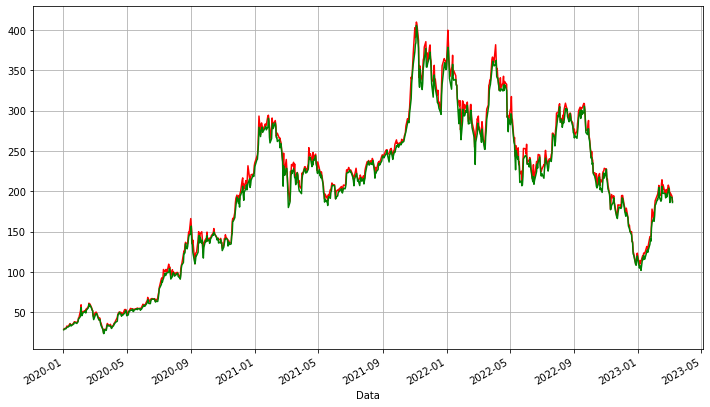

In [32]:
df.Zamkniecie.plot(figsize=(12,7), grid=True, color="red")
df.Najnizszy.plot(figsize=(12,7), grid=True, color="green")

<AxesSubplot:xlabel='Data'>

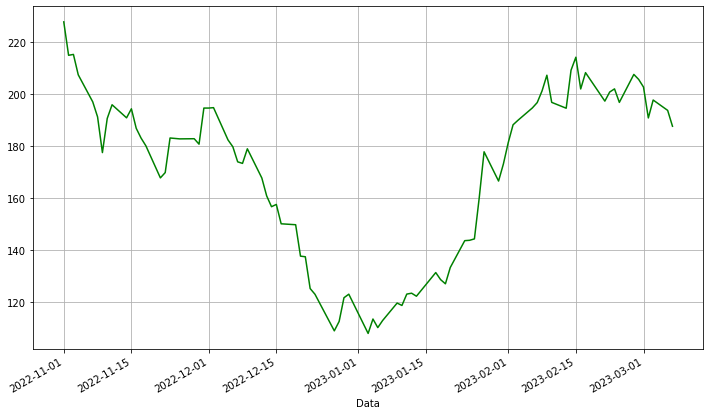

In [42]:
df.Zamkniecie.loc["2022-11":].plot(figsize=(12,7), grid=True, color="green")

<AxesSubplot:ylabel='Data'>

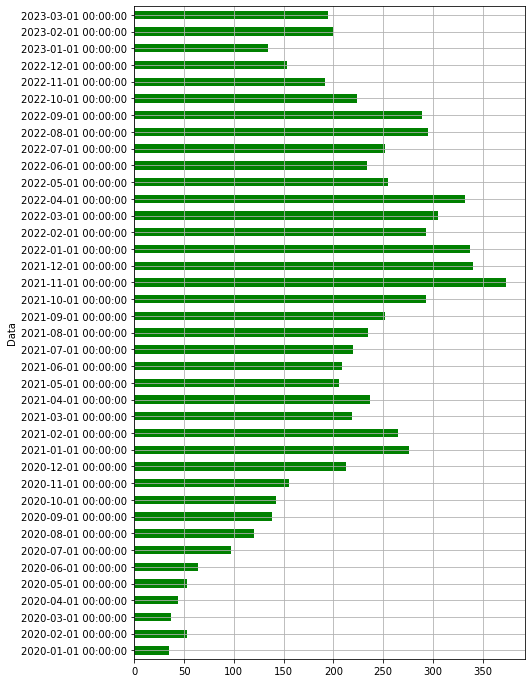

In [49]:
# średni kurs miesięczny dla zamknięcia
df.Zamkniecie.resample("MS").mean().plot(figsize=(7,12), grid=True, color="green", kind="barh")

In [50]:
# maks. kurs 10-dniowy
df.Zamkniecie.resample("10D").max()

Data
2020-01-02     32.8093
2020-01-12     36.4800
2020-01-22     43.3700
2020-02-01     59.1367
2020-02-11     61.1600
                ...   
2023-01-26    189.9800
2023-02-05    209.2500
2023-02-15    214.2400
2023-02-25    207.6300
2023-03-07    187.7100
Freq: 10D, Name: Zamkniecie, Length: 117, dtype: float64

<AxesSubplot:xlabel='Data'>

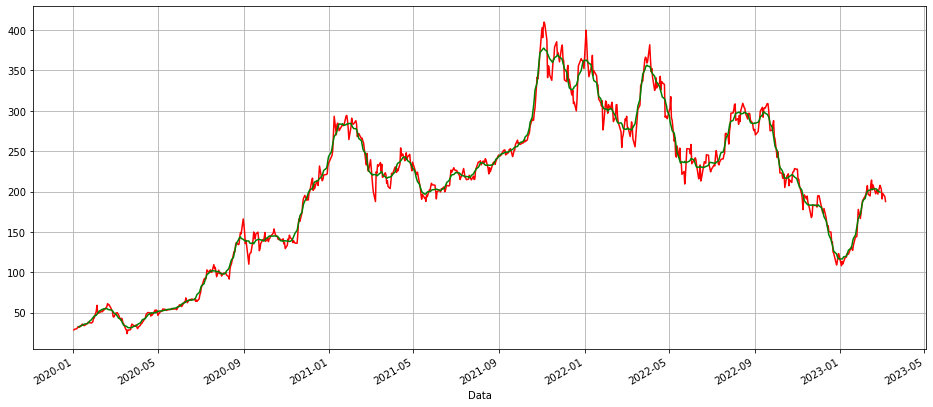

In [63]:
df.Zamkniecie.plot(figsize=(16,7), grid=True, color="red")

df.Zamkniecie.rolling(12).mean().shift(-6).plot(figsize=(16,7), grid=True, color="green")

In [60]:
df.Zamkniecie.rolling(60).mean().shift(-60)

Data
2020-01-02    41.776933
2020-01-03    41.866922
2020-01-06    41.900277
2020-01-07    41.884065
2020-01-08    41.870588
                ...    
2023-03-01          NaN
2023-03-02          NaN
2023-03-03          NaN
2023-03-06          NaN
2023-03-07          NaN
Name: Zamkniecie, Length: 800, dtype: float64

In [68]:
df.reset_index(inplace=True)
df.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2020-01-02,28.3000,28.7130,28.1140,28.6840,143375790
1,2020-01-03,29.3667,30.2667,29.1280,29.5340,266920455
2,2020-01-06,29.3647,30.1040,29.3333,30.1027,152362485
3,2020-01-07,30.7600,31.4420,30.2237,31.2707,273137070
4,2020-01-08,31.5800,33.2333,31.2153,32.8093,467990895


In [72]:
df.Data.dt.week 

C:\Users\kurs\AppData\Local\Temp\ipykernel_2400\2997376090.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.Data.dt.week


0       1
1       1
2       2
3       2
4       2
       ..
795     9
796     9
797     9
798    10
799    10
Name: Data, Length: 800, dtype: int64

In [73]:
url = "https://stooq.pl/q/d/l/?s=tsla.us&d1=20200101&d2=20230307&i=d"
df = pd.read_csv(url)
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2020-01-02,28.3000,28.7130,28.1140,28.6840,143375790
1,2020-01-03,29.3667,30.2667,29.1280,29.5340,266920455
2,2020-01-06,29.3647,30.1040,29.3333,30.1027,152362485
3,2020-01-07,30.7600,31.4420,30.2237,31.2707,273137070
4,2020-01-08,31.5800,33.2333,31.2153,32.8093,467990895
...,...,...,...,...,...,...
795,2023-03-01,206.2100,207.2000,198.5200,202.7700,156852790
796,2023-03-02,186.7400,193.7499,186.0100,190.9000,181979154
797,2023-03-03,194.7950,200.4800,192.8800,197.7900,154193277
798,2023-03-06,198.5400,198.6000,192.3000,193.8100,128100106


In [78]:
df["Data1"] = df.Data.str.replace("2020", "ABCD")
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Data1
0,2020-01-02,28.3000,28.7130,28.1140,28.6840,143375790,ABCD-01-02
1,2020-01-03,29.3667,30.2667,29.1280,29.5340,266920455,ABCD-01-03
2,2020-01-06,29.3647,30.1040,29.3333,30.1027,152362485,ABCD-01-06
3,2020-01-07,30.7600,31.4420,30.2237,31.2707,273137070,ABCD-01-07
4,2020-01-08,31.5800,33.2333,31.2153,32.8093,467990895,ABCD-01-08
...,...,...,...,...,...,...,...
795,2023-03-01,206.2100,207.2000,198.5200,202.7700,156852790,2023-03-01
796,2023-03-02,186.7400,193.7499,186.0100,190.9000,181979154,2023-03-02
797,2023-03-03,194.7950,200.4800,192.8800,197.7900,154193277,2023-03-03
798,2023-03-06,198.5400,198.6000,192.3000,193.8100,128100106,2023-03-06
